In [1]:
from os import path
import pandas as pd
import urllib
import zipfile
url = u'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/'
filename = 'household_power_consumption'
zipfilename = filename + '.zip'
Location = url + zipfilename
if not(path.isfile(zipfilename)):
    urllib.request.urlretrieve(Location, zipfilename)
zip = zipfile.ZipFile(zipfilename)
zip.extractall()

na_values = ['?', '']
fields = ['Date', 'Time', 'Global_active_power']
df = pd.read_csv(filename + '.txt', sep=';', nrows=200000,
na_values=na_values, usecols=fields)

dfnull=df.loc[pd.isnull(df['Global_active_power'])==True]
#print(df)
#print(dfnull)
#print(dfnull.count())

dfnonnull=df.dropna(how='any')

dfnonnull['Date']=pd.to_datetime(dfnonnull['Date'], dayfirst=True)

dfnonnull=dfnonnull.set_index('Date')
#print(dfnonnull.head(10))

dfja=dfnonnull.ix['2007-1-1':'2007-4-30']
dfavg = dfja.groupby(dfja.index).mean()
print(dfavg)


            Global_active_power
Date                           
2007-01-01             1.909031
2007-01-02             0.881414
2007-01-03             0.704204
2007-01-04             2.263481
2007-01-05             1.884281
2007-01-06             1.047485
2007-01-07             1.699736
2007-01-08             1.556500
2007-01-09             1.297954
2007-01-10             1.496389
2007-01-11             1.566107
2007-01-12             1.014789
2007-01-13             2.213065
2007-01-14             2.090213
2007-01-15             1.492137
2007-01-16             1.171114
2007-01-17             1.977561
2007-01-18             1.264904
2007-01-19             1.028083
2007-01-20             2.176203
2007-01-21             2.366154
2007-01-22             1.514232
2007-01-23             1.234472
2007-01-24             2.074899
2007-01-25             1.108572
2007-01-26             1.123592
2007-01-27             1.419494
2007-01-28             2.147466
2007-01-29             1.376850
2007-01-

c:\program files\python35\lib\site-packages\ipykernel\__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


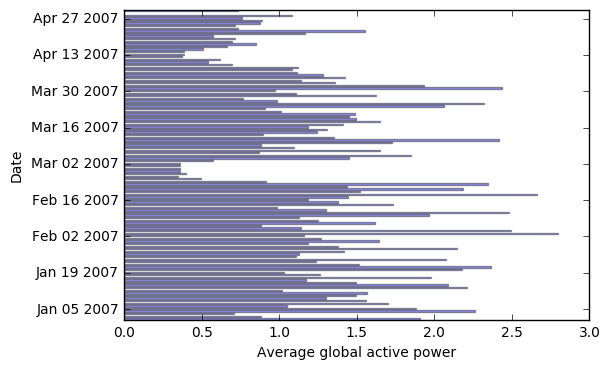

In [22]:

import matplotlib.pyplot as plt
import numpy as np
#import scipy
#import ggplot

bar_width = 0.5
opacity = 0.4

plt.barh( dfavg.index,dfavg['Global_active_power'], bar_width,
                 alpha=opacity,
                 color='b')

plt.xlabel('Average global active power')
plt.ylabel('Date')
fig=plt.show()

#by_day = indexdate.groupby(day).mean()
#by_day.index.name = 'day'
#by_day = by_day.reset_index()
#ggplot(dfavg, aes('day', weight='Global_active_power')) + \
#    geom_bar() + \
#    scale_y_continuous(labels='comma') + \
#    ggtitle('Head of Cattle Slaughtered by Decade')

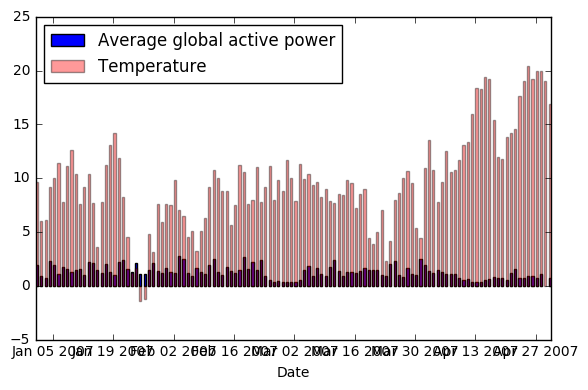

In [2]:
from os import path
import pandas as pd
import urllib
import zipfile

na_values = ['?', '']
fields = ['DATE', 'TG']
tg = pd.read_csv('TG_STAID011249.txt', sep=',',na_values=na_values,usecols=fields)
#print(tg.head(10))

tg['TG']=tg['TG']/10;
#print(tg.head(10))

tgnonnull=tg.dropna(how='any')
#print(tgnonnull.head(10))
dates=pd.DataFrame({'year': tgnonnull['DATE']//10000,'month': tgnonnull['DATE']%10000//100,
                        'day': tgnonnull['DATE']%10000%100 })
#print(tgnonnull.head(10))
tgnonnull['DATE']=pd.to_datetime(dates)
#print(tgnonnull.head(10))

tgnonnull=tgnonnull.set_index('DATE')
tgja=tgnonnull.ix['2007-1-1':'2007-4-30']
#print(tgja)

import matplotlib.pyplot as plt
import numpy as np

bar_width = 0.5

rects1=plt.bar( dfavg.index,dfavg['Global_active_power'], bar_width,
                 alpha=1,
                 color='b',
                 label='Average global active power')
rects2=plt.bar( tgja.index,tgja['TG'], bar_width,
                 alpha=0.4,
                 color='r',
                 label='Temperature')

plt.xlabel('Date')
plt.legend(loc=2)
plt.tight_layout()
plt.show(rects1,rects2)

In [56]:
print(dfnonnull.head(10))
pd.to_datetime(str(19210301))
#a=[111615,21651651]
#str(a)
#str(tgnonnull['DATE'])
7//2

                Time  Global_active_power
Date                                     
2006-12-16  17:24:00                4.216
2006-12-16  17:25:00                5.360
2006-12-16  17:26:00                5.374
2006-12-16  17:27:00                5.388
2006-12-16  17:28:00                3.666
2006-12-16  17:29:00                3.520
2006-12-16  17:30:00                3.702
2006-12-16  17:31:00                3.700
2006-12-16  17:32:00                3.668
2006-12-16  17:33:00                3.662


3

In [4]:
import numpy
import scipy
import statsmodels

ImportError: No module named 'statsmodels'